# Laboratorio 5

1. Load the New York Point Of Interest dataset exploiting Pandas APIs

In [98]:
import pandas as pd
from zipfile import ZipFile, Path
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [19]:
with ZipFile('NYC_POIs.zip') as zipped_file:
    zipped_file.extractall(os.getcwd())

In [20]:
data_IN = pd.read_csv('pois_all_info', sep='\t')

D:\Anaconda\envs\data_science_lab_2\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
data_id_IN = pd.read_csv('ny_municipality_pois_id.csv', header=None)

data_id_IN.head(5)

,0
0,42432939
1,42448838
2,42723103
3,42764076
4,42811266


In [22]:
data_IN['@id'].count()

77884

In [23]:
data_IN['@id'].isin(data_id_IN[0]).sum()

53521

In [24]:
data_IN = data_IN[data_IN['@id'].isin(data_id_IN[0])]

In [25]:
data_IN.isna().sum()

@id                     0
@type                   0
@lat                    0
@lon                    0
amenity             28824
name                22972
shop                44804
public_transport    45146
highway             45962
dtype: int64

In [26]:
data_IN.dtypes

@id                   int64
@type                object
@lat                float64
@lon                float64
amenity              object
name                 object
shop                 object
public_transport     object
highway              object
dtype: object

In [27]:
data_IN = data_IN.astype({
    'amenity': 'string', 
    'name' : 'string', 
    'shop' : 'string', 
    'public_transport' : 'string',
    'highway' : 'string'
})

In [28]:
data_IN.dtypes

@id                   int64
@type                object
@lat                float64
@lon                float64
amenity              string
name                 string
shop                 string
public_transport     string
highway              string
dtype: object

2. For each column in the loaded dataset count the number of missing values

In [29]:
data_IN.isna().sum()

@id                     0
@type                   0
@lat                    0
@lon                    0
amenity             28824
name                22972
shop                44804
public_transport    45146
highway             45962
dtype: int64

3. Now, analyze the distribution of the POI types for each POI category

In [30]:
def plot_frequency_with_threshold(df_IN, col, thr = 0):
    df = pd.DataFrame(df_IN[col].value_counts()).reset_index()
    df = df[df[col] >= thr*df[col].sum()]
    print(f'{col} plot')
    df.plot.bar(x='index', y=col)
    return df

amenity plot


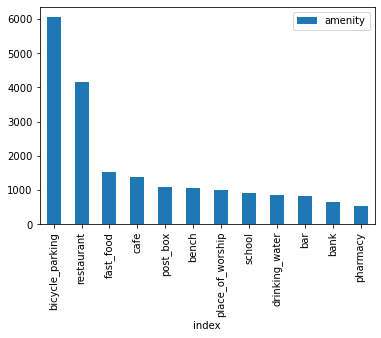

In [31]:
amenity_freq_fltrd = plot_frequency_with_threshold(data_IN, 'amenity', thr = 0.02)

name plot


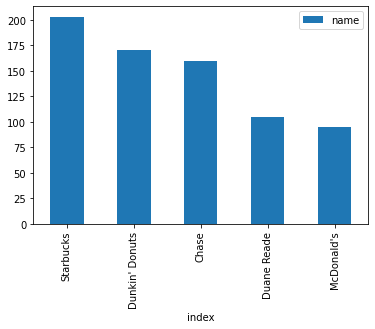

In [149]:
name_freq_fltrd = plot_frequency_with_threshold(data_IN, 'name', thr=0.003)

shop plot


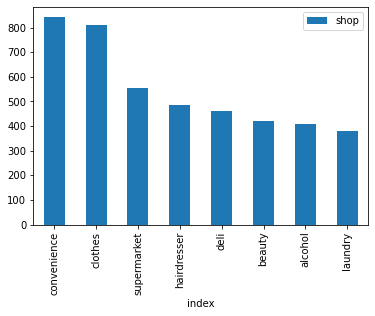

In [152]:
shop_freq_fltrd = plot_frequency_with_threshold(data_IN, 'shop', thr=0.04)

public_transport plot


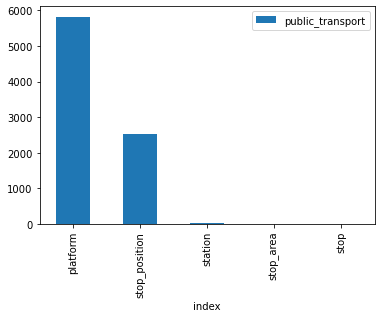

In [34]:
public_transport_freq_fltrd = plot_frequency_with_threshold(data_IN, 'public_transport')

highway plot


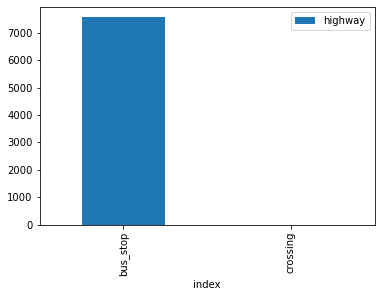

In [35]:
highway_freq_fltrd = plot_frequency_with_threshold(data_IN, 'highway')

4. Show the points of interest on the New York map for a given category (e.g. amenity).

In [153]:
def NY_map_plot(df_IN, col, thr = 0):
    df = df_IN.loc[df_IN[col].notna(),:]
    df = df.loc[:,['@id','@type','@lat','@lon',col]]
    df['col_count'] = df.groupby(col)[col].transform('count')
    df = df.loc[df['col_count']>=df.groupby(col)[col].aggregate('count').sum()*thr,:]

    color_labels = list(df[col].unique())
    rgb_values = sns.color_palette("Set2", len(df[col].unique()))
    color_map = dict(zip(color_labels, rgb_values))

    fig, ax = plt.subplots(figsize= (10,10))
    img = plt.imread('New_York_City_Map.PNG')

    coord_extremes = {
        'left' : df['@lon'].min(),
        'right' : df['@lon'].max(),
        'bottom' : df['@lat'].min(),
        'up' : df['@lat'].max()
    }

    ax.imshow(img, zorder=0, extent=[coord_extremes['left'],coord_extremes['right'],coord_extremes['bottom'],coord_extremes['up']])
    ax.scatter(df['@lon'], df['@lat'], c = df[col].map(color_map), s = 2, zorder=1)
    plt.show()

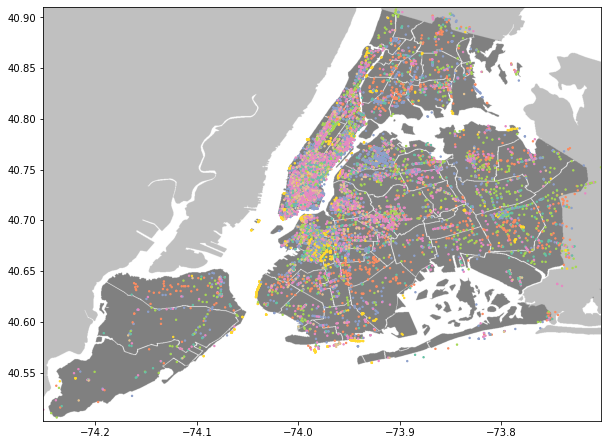

In [174]:
NY_map_plot(data_IN, 'amenity', 0.04)

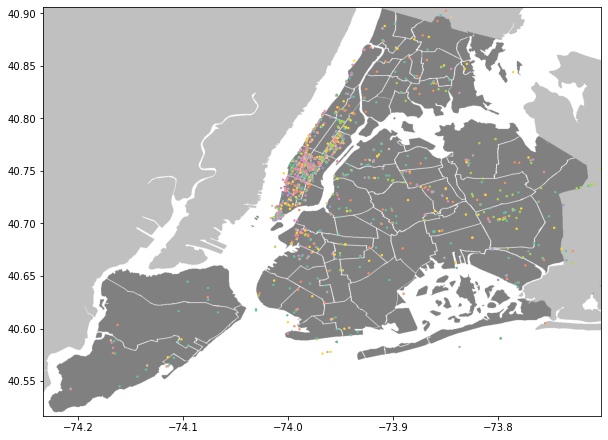

In [172]:
NY_map_plot(data_IN, 'name', 0.002)

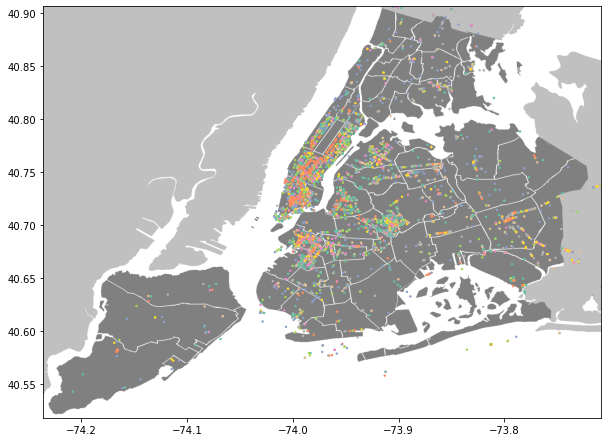

In [156]:
NY_map_plot(data_IN, 'shop', 0.04)

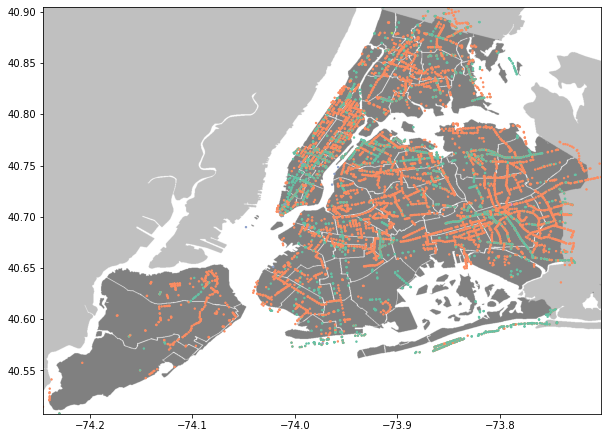

In [157]:
NY_map_plot(data_IN, 'public_transport')

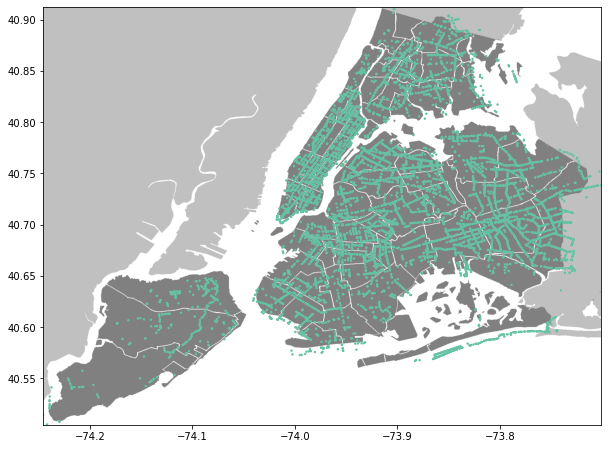

In [158]:
NY_map_plot(data_IN, 'highway')

5. Discretize the POIs by geographical position